In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# Lectura  y analisis del csv

In [2]:
data = pd.read_csv('CSVs/SPOILER_INTC.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,17/03/1980,0.325521,0.330729,0.325521,0.325521,0.200766,10924800
1,18/03/1980,0.325521,0.328125,0.322917,0.322917,0.199160,17068800
2,19/03/1980,0.330729,0.335938,0.330729,0.330729,0.203978,18508800
3,20/03/1980,0.330729,0.334635,0.329427,0.329427,0.203175,11174400
4,21/03/1980,0.322917,0.322917,0.317708,0.317708,0.195948,12172800


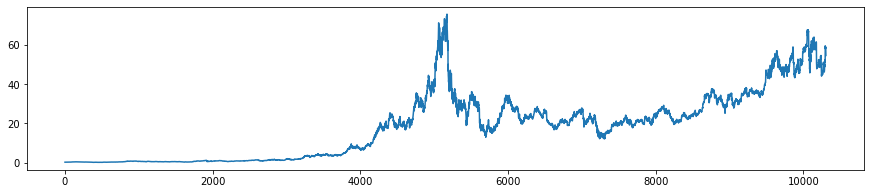

In [3]:
# graficamos una columna para ver la naturaleza de los datos

data['Open'].plot(figsize=(15,3))# se puede graficar cualquier columna cambiando Open por el nombrte de la columna de interes 
plt.show()

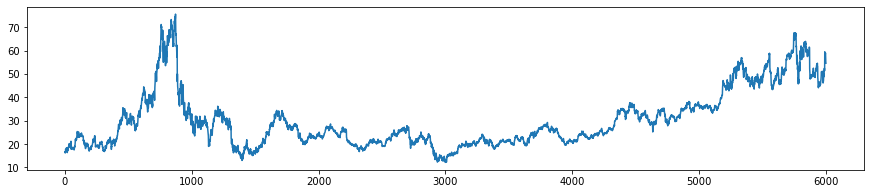

,Date,Open,High,Low,Close,Adj Close,Volume
0,20/03/1997,16.703125,16.906250,16.406250,16.656250,10.421027,107778400
1,21/03/1997,16.703125,16.773438,16.296875,16.312500,10.205953,82396800
2,24/03/1997,16.203125,16.390625,15.718750,16.328125,10.215730,169920800
3,25/03/1997,16.406250,16.875000,16.250000,16.656250,10.421027,115583200
4,26/03/1997,16.843750,17.593750,16.781250,17.578125,10.997798,127732800


In [4]:
#eliminamos la parte del dataset que no nos interesa 

data = data[data.index>4300].reset_index(drop=True)

data['Open'].plot(figsize=(15,3))
plt.show()

data.head(5)


# Funcion Time series


In [5]:
def make_timeseries_dataset(signal, n_timesteps_lookback):
    
    r = signal.shift(periods = -n_timesteps_lookback)
    r = r.shift(periods=n_timesteps_lookback).dropna()
    
    for i in range(-n_timesteps_lookback,0):
        
        c = signal.shift(periods = i+1)
        c = c.shift(periods=n_timesteps_lookback).dropna()
        r = r.join(c, rsuffix=str(-n_timesteps_lookback-i-1))

    futuro = signal.shift(periods = -n_timesteps_lookback-1)
    futuro = futuro.shift(periods = n_timesteps_lookback)

    r = r.join(futuro, rsuffix='+1').dropna()
    
    return r

La funcion solo recibe dataframes de pandas por lo cual se ingresa la columna con el constructor de pandas (pd.DataFrame())
Esta funcion crea un dataset donde cada fila representa  

In [17]:
lookBack = 5

dataset = make_timeseries_dataset(pd.DataFrame(data['Close']), n_timesteps_lookback=5).reset_index(drop=True)
dataset.head(5)

,Close,Close-1,Close-2,Close-3,Close-4,Close-5,Close+1
0,17.390625,17.578125,16.656250,16.328125,16.312500,16.656250,17.390625
1,17.390625,17.390625,17.578125,16.656250,16.328125,16.312500,17.414063
2,17.414063,17.390625,17.390625,17.578125,16.656250,16.328125,17.125000
3,17.125000,17.414063,17.390625,17.390625,17.578125,16.656250,17.578125
4,17.578125,17.125000,17.414063,17.390625,17.390625,17.578125,18.125000


# Ejemplos 
# 1 "avance"

In [21]:
# Se del dataset principal se toma solo la columna que representa el valor actual (actual)
actual = dataset.drop([i for i in dataset.columns if i!="Close"], axis=1)

# El  "avance se calcula dividiendo el valllor actual por el valor de hace "lookBack" dias
avance = (dataset['Close'].values / dataset['Close-'+str(lookBack)].values )-1

#La linea anterior entrega una lista de datos los cuales tenemos que convertir a pandas de nuevo
avance = pd.DataFrame(data = avance, columns = ['avance'])
avance.head(5)

,avance
0,0.044090
1,0.066092
2,0.066507
3,0.028143
4,0.000000


# 2 Coeficiente de varianza
Del dataset original dropeamos las columnas que no nos interesan y creamos un timseries dataset de las columnas resultantes

In [30]:
var_coef = data.drop(['Date','Adj Close','Volume'],axis=1)
var_coef = make_timeseries_dataset(var_coef, n_timesteps_lookback=lookBack).reset_index(drop=True)
var_coef.head(5)

,Open,High,Low,Close,Open-1,High-1,Low-1,Close-1,Open-2,High-2,...,Low-4,Close-4,Open-5,High-5,Low-5,Close-5,Open+1,High+1,Low+1,Close+1
0,17.812500,17.984375,17.156250,17.390625,16.843750,17.593750,16.781250,17.578125,16.406250,16.875000,...,16.296875,16.312500,16.703125,16.906250,16.406250,16.656250,17.343750,17.531250,17.125000,17.390625
1,17.343750,17.531250,17.125000,17.390625,17.812500,17.984375,17.156250,17.390625,16.843750,17.593750,...,15.718750,16.328125,16.703125,16.773438,16.296875,16.312500,17.203125,17.468750,17.171875,17.414063
2,17.203125,17.468750,17.171875,17.414063,17.343750,17.531250,17.125000,17.390625,17.812500,17.984375,...,16.250000,16.656250,16.203125,16.390625,15.718750,16.328125,17.359375,17.421875,17.062500,17.125000
3,17.359375,17.421875,17.062500,17.125000,17.203125,17.468750,17.171875,17.414063,17.343750,17.531250,...,16.781250,17.578125,16.406250,16.875000,16.250000,16.656250,17.031250,17.625000,17.015625,17.578125
4,17.031250,17.625000,17.015625,17.578125,17.359375,17.421875,17.062500,17.125000,17.203125,17.468750,...,17.156250,17.390625,16.843750,17.593750,16.781250,17.578125,17.484375,18.171875,17.453125,18.125000


Se dropean las columnas que miran hacia adelante usando la funcion str.find() para buscar las columnas con un +1 en su nombre, luego Se toma el dataset correspondiente y se transpone para que cada columna equivalga a las muestras de los "lookBack" dias, se usa la funcion de DataFrame.describe() para extraer toda la informacion estadistica de cada una de estas columnas como El valor medio la desviacion estandas...... luego se transpone de nuevo para que cada fila corresponda a cada dia del dataset y sus "lookBack" dias atras

In [31]:
var_coef = var_coef.drop([i for i in var_coef.columns if i.find('+1')!=-1], axis=1)
var_coef = var_coef.T.describe().T

var_coef.head(5)

,count,mean,std,min,25%,50%,75%,max
0,24.0,16.780273,0.560621,15.71875,16.375000,16.703125,16.968750,17.984375
1,24.0,16.893555,0.594049,15.71875,16.375000,16.812500,17.390625,17.984375
2,24.0,17.025716,0.579658,15.71875,16.593750,17.164062,17.427735,17.984375
3,24.0,17.206055,0.414532,16.25000,17.015625,17.273438,17.433594,17.984375
4,24.0,17.333659,0.293155,16.78125,17.125000,17.375000,17.542969,17.984375


Se dropean las columnas inecesarias y nos quedamos con las columnas std y mean, luego se dividen los valores de la columna std por los valores de la columna mean para obtener el coeficiente de varianza, (se usa el coeficiennte de varienza porque se encuentra normalizado entre 0 y 1, ideal para su uso con redes neuronales) por ultimo esta lista de datos se convierte de nuevo a un pandas DataFrame

In [32]:
var_coef = var_coef.drop([i for i in var_coef.columns if i!="std" and i!="mean"], axis=1)
var_coef = var_coef['std'].values / var_coef['mean'].values

var_coef = pd.DataFrame(data = var_coef, columns = ['coeficiente de varianza'])
var_coef.head(5)

,coeficiente de varianza
0,0.033410
1,0.035164
2,0.034046
3,0.024092
4,0.016912


# 3 volumen

In [37]:
volumen = data.drop(['Date','Open','High','Low','Adj Close','Close'], axis=1)
volumen = make_timeseries_dataset(volumen, n_timesteps_lookback=15).reset_index(drop=True).drop(['Volume+1'],axis=1)
ult_volumen = volumen['Volume'].values
volumen = volumen.T.describe().T

volumen = volumen.drop([i for i in volumen.columns if i!="std" and i!="mean"], axis=1)
ult_volumen = (ult_volumen/volumen['mean'].values)-1
ult_volumen = pd.DataFrame(data = ult_volumen, columns = ['ultimo volumen'])
volumen = volumen['std'].values / volumen['mean'].values

volumen = pd.DataFrame(data = volumen, columns = ['coeficiente de varianza del volumen'])
volumen.head(5)


,coeficiente de varianza del volumen
0,0.266819
1,0.271821
2,0.289415
3,0.287876
4,0.285851


In [38]:
ult_volumen.head(5)

,ultimo volumen
0,0.661332
1,0.302427
2,0.582705
3,-0.175818
4,0.066390


In [39]:
actual.head(5)

,Close
0,17.390625
1,17.390625
2,17.414063
3,17.125000
4,17.578125


# 4 union de las columnas en un solo dataset

In [40]:
datos = actual.join(ult_volumen, lsuffix='_caller', rsuffix='_other')
datos = datos.join(volumen, lsuffix='_caller', rsuffix='_other')
datos = datos.join(var_coef, lsuffix='_caller', rsuffix='_other')
datos = datos.join(avance, lsuffix='_caller', rsuffix='_other')
datos.head(5)

,Close,ultimo volumen,coeficiente de varianza del volumen,coeficiente de varianza,avance
0,17.390625,0.661332,0.266819,0.033410,0.044090
1,17.390625,0.302427,0.271821,0.035164,0.066092
2,17.414063,0.582705,0.289415,0.034046,0.066507
3,17.125000,-0.175818,0.287876,0.024092,0.028143
4,17.578125,0.066390,0.285851,0.016912,0.000000


# Se guarda el dataset en un archivo CSV

In [39]:
datos.to_csv('datasets/dataset_normalizado.csv') 